<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/Deep_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test)  = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Reshape the image dataset to fit to tensorflow format
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# One hot Encoding of labels
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [0]:
def cnn():
  model = Sequential()
  
  model.add(Conv2D(input_shape =  (X_train.shape[1], X_train.shape[2],  X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1, 1), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  model.add(Flatten())
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  
  adam = optimizers.Adam()
  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model


In [5]:
model = cnn()


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
train_history = model.fit(X_train, Y_train, batch_size = 128, validation_split = 0.1, epochs = 100, verbose = 1)


Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s 211us/step - loss: 0.7911 - acc: 0.8661 - val_loss: 0.0665 - val_acc: 0.9810
Epoch 2/100
54000/54000 [==============================] - 7s 122us/step - loss: 0.0684 - acc: 0.9791 - val_loss: 0.0605 - val_acc: 0.9828
Epoch 3/100
54000/54000 [==============================] - 7s 122us/step - loss: 0.0476 - acc: 0.9847 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 4/100
54000/54000 [==============================] - 7s 121us/step - loss: 0.0386 - acc: 0.9877 - val_loss: 0.0488 - val_acc: 0.9865
Epoch 5/100
54000/54000 [==============================] - 7s 122us/step - loss: 0.0290 - acc: 0.9903 - val_loss: 0.0439 - val_acc: 0.9875
Epoch 6/100
54000/54000 [==============================] - 7s 122us/step - loss: 0.0277 - acc: 0.9905 - val_loss: 0.0403 - val_acc: 0.9893
Epoch 7/100
54000/54000 [==============================] - 7s 122us/

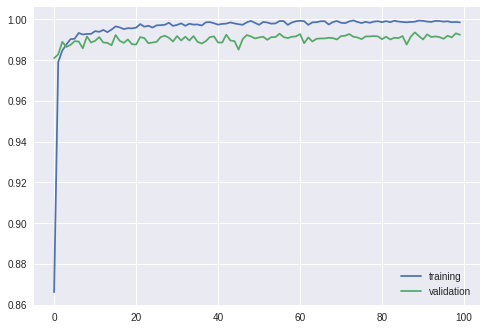

In [7]:
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.show()

In [8]:
results = model.evaluate(X_test, Y_test)
print('Test Accuracy:', results[1])

10000/10000 [==============================] - 1s 91us/step
Test Accuracy: 0.99
